In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

In [10]:
donnee = pd.read_csv('./Fichiers/Poissonsv0r2.csv')
donnee=donnee.dropna()
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

X=donnee.drop({'Espèces','Poids (g)'}, 1)
Y=donnee['Poids (g)']
Yclass=donnee['Espèces']

/tmp/ipykernel_181094/1687494023.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=donnee.drop({'Espèces','Poids (g)'}, 1)


In [4]:
"Ronde 1"
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Poids (g)   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.95e-70
Time:                        16:45:12   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Longueur 1 (cm)    62.3552     40.209      1.551      0.123     -17.081     141.791
Longueur 2 (cm)    -6.5268     41.759     -0.156      0.876     -89.025      75.971
Longueur 3 (cm)   -29.0262     17.353     -1.673      0.096     -63.309       5.256
Hauteur (cm)       28.2974      8.729      3.242      0.001      11.052      45.543
Épaisseur (cm)     22.4733     20.372      1.103      0.272     -17.773      62.720
const            -499.5870     29.572    -16.894      0.000    -558.010    -441.164
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

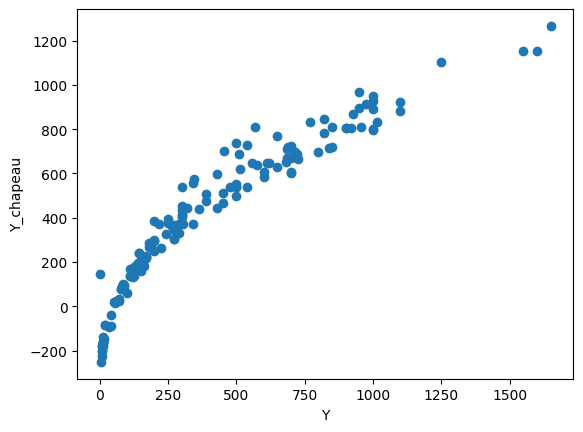

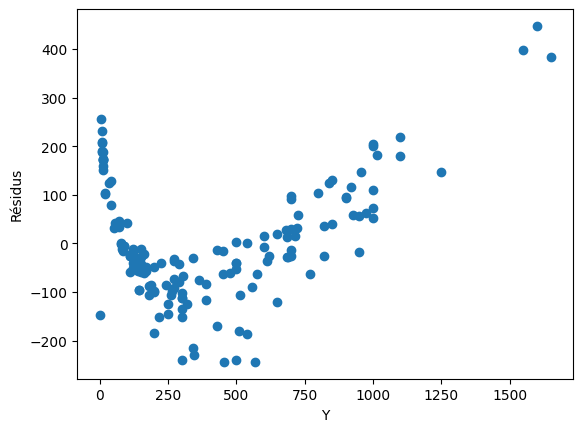

In [11]:
plt.scatter(Y, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()

Epsilon=Y.values.reshape(-1,1)-Y_chap.values.reshape(-1,1)
plt.figure(1)
plt.plot(Y.values, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()

Text(0.5, 0, 'Poids (g) Transformé Box-Cox')

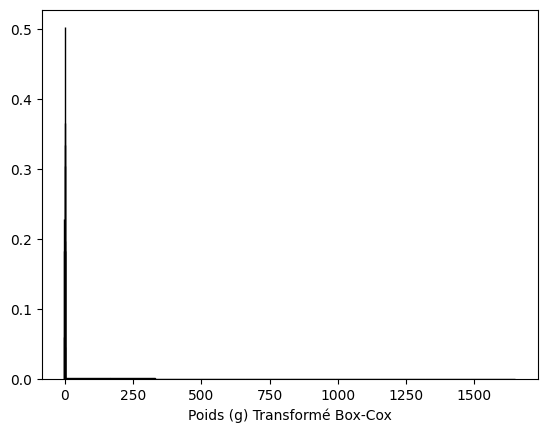

In [12]:
"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"Transformation Box-Cox"

ax=plt.hist(Y,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Poids (g)")

### Box-cox: estritamente MAIOR q 0
X_BC=X[(Y != 0)]
Y_BC=Y[(Y != 0)]

from sklearn.preprocessing import PowerTransformer

### Transformacao box-cox (só valores positivos)
ptY_BC = PowerTransformer(method='box-cox')
ptY_BC.fit(Y_BC.values.reshape(-1,1))
lambdasY=ptY_BC.lambdas_
Ytransf_BC=ptY_BC.transform(Y_BC.values.reshape(-1,1))

ax=plt.hist(Ytransf_BC,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Poids (g) Transformé Box-Cox")

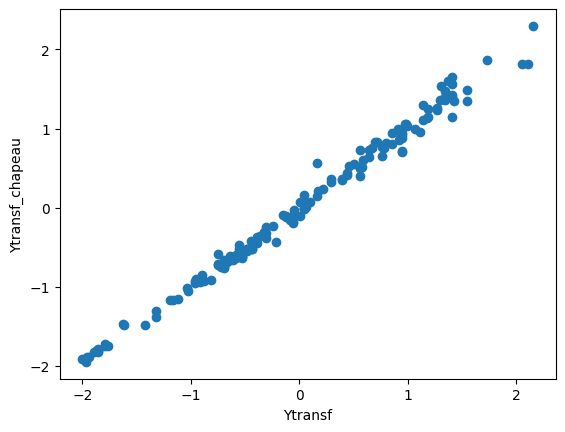

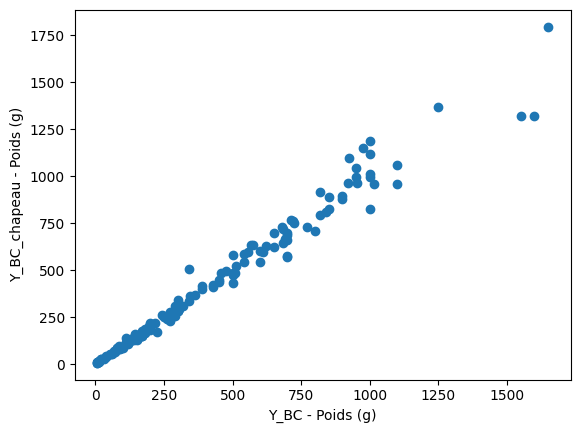

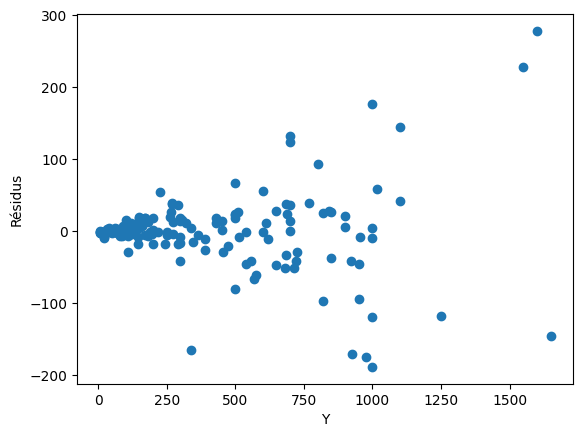

((array([-2.62148361, -2.30354173, -2.12152751, -1.99076719, -1.8871843 ,
         -1.80060859, -1.72574306, -1.65946215, -1.59976037, -1.54527067,
         -1.49501756, -1.44827945, -1.40450687, -1.36327131, -1.3242318 ,
         -1.28711237, -1.25168634, -1.21776515, -1.18519012, -1.15382642,
         -1.12355845, -1.09428627, -1.0659229 , -1.03839209, -1.01162664,
         -0.98556696, -0.96015997, -0.93535814, -0.91111873, -0.88740318,
         -0.86417653, -0.84140698, -0.81906553, -0.79712561, -0.77556286,
         -0.75435483, -0.73348079, -0.71292156, -0.69265936, -0.67267763,
         -0.65296095, -0.6334949 , -0.61426601, -0.59526161, -0.57646982,
         -0.55787943, -0.53947988, -0.5212612 , -0.50321392, -0.48532908,
         -0.46759815, -0.45001304, -0.432566  , -0.41524966, -0.39805696,
         -0.38098113, -0.36401567, -0.34715436, -0.33039117, -0.31372032,
         -0.29713621, -0.28063343, -0.26420673, -0.24785102, -0.23156135,
         -0.2153329 , -0.19916096, -0.

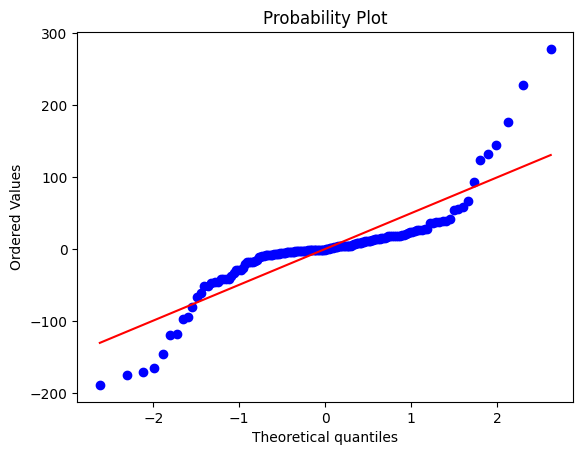

In [13]:
ptX_BC = PowerTransformer(method='box-cox')
ptX_BC.fit(X_BC.values)
lambdasX=ptX_BC.lambdas_
Xtransf_BC=ptX_BC.transform(X_BC.values)


modele=sm.OLS(Ytransf_BC,X_BC.assign(const=1))
resultats=modele.fit()
Ytransf_chap = resultats.predict(X_BC.assign(const=1))
resultats.summary()
plt.scatter(Ytransf_BC, Ytransf_chap)
plt.xlabel("Ytransf")
plt.ylabel("Ytransf_chapeau")
plt.show()

Y_BC_chapeau = ptY_BC.inverse_transform(Ytransf_chap.values.reshape(-1,1))
plt.scatter(Y_BC, Y_BC_chapeau)
plt.xlabel("Y_BC - Poids (g)")
plt.ylabel("Y_BC_chapeau - Poids (g)")
plt.show()

Epsilon=Y_BC.values.reshape(-1,1)-Y_BC_chapeau.reshape(-1,1)
plt.figure(1)
plt.plot(Y_BC.values, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()

sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))

In [14]:
"Standardisation"

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
scalerY = StandardScaler() 
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns
Ystand=pd.DataFrame(Ystand)
Ystand.columns=["Poids (kg)"]

modele=sm.OLS(Ystand,Xstand.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xstand.assign(const=1))
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Poids (kg)   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.95e-70
Time:                        16:49:21   Log-Likelihood:                -53.468
No. Observations:                 159   AIC:                             118.9
Df Residuals:                     153   BIC:                             137.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Longueur 1 (cm)     1.7413      1.123      1.551      0.123      -0.477       3.959
Longueur 2 (cm)    -0.1954      1.250     -0.156      0.876      -2.665       2.274
Longueur 3 (cm)    -0.9414      0.563     -1.673      0.096      -2.053       0.170
Hauteur (cm)        0.3388      0.105      3.242      0.001       0.132       0.545
Épaisseur (cm)      0.1058      0.096      1.103      0.272      -0.084       0.295
const            1.457e-16      0.027   5.32e-15      1.000      -0.054       0.054
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

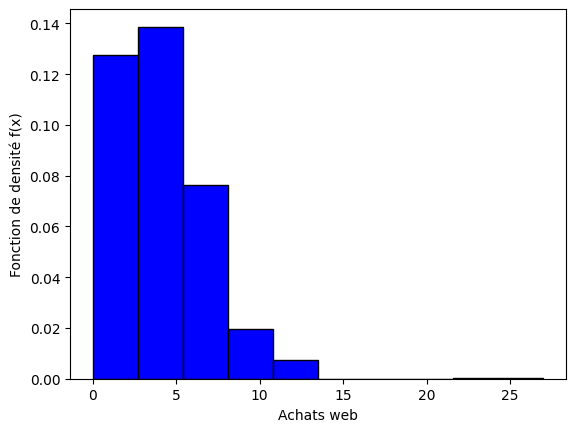

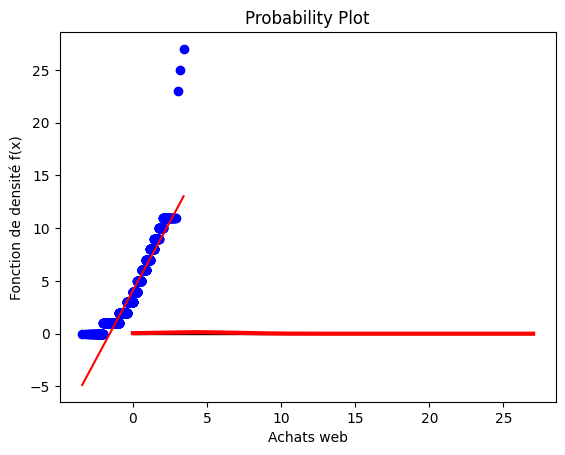

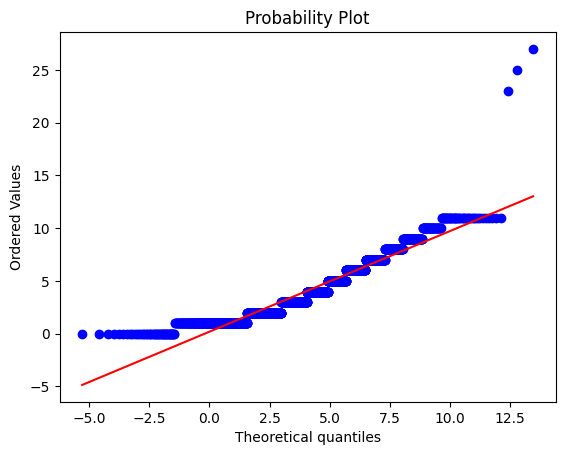

In [16]:
"Pré-traitement"

donnee = pd.read_csv('./Fichiers/DonneesMarketingv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

donnee=donnee.dropna()

Variable=donnee["Achats web"]
var_nom="Achats web"
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.set_ylabel("Fonction de densité f(x)")

"Vérifier si les données sont normales"
sts.probplot(Variable.values, dist=sts.norm, plot=plt.figure().add_subplot(111))

d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
mu, sigma = sts.norm.fit(Variable.values)
param=sts.norm.fit(Variable.values)
pdf = sts.norm.pdf(grille_x, mu, sigma)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


sts.probplot(Variable.values, dist=sts.norm(mu, sigma), plot=plt.figure().add_subplot(111))
Fit_normal = sts.kstest(Variable,'norm',param)

In [1]:
"Vérifier si les données suivent une loi exponentielle"

d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
loc,lambdaa=sts.expon.fit(Variable.values)
param=sts.expon.fit(Variable.values)
pdf = sts.expon.pdf(grille_x,loc,lambdaa)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


sts.probplot(Variable.values, dist=sts.expon(loc,lambdaa),plot=plt.figure().add_subplot(111))
Fit_expon = sts.kstest(Variable.values,'expon',param)

NameError: name 'np' is not defined

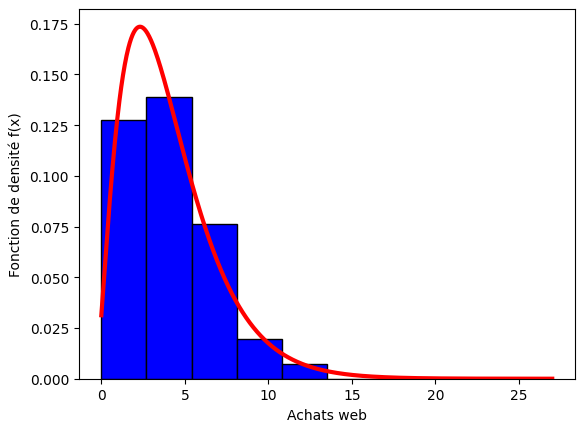

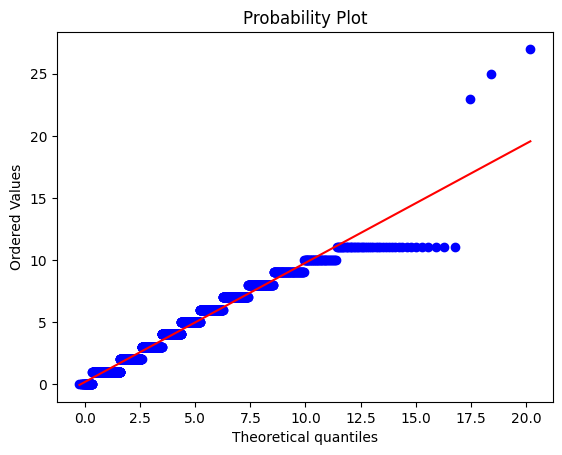

In [18]:
"Vérifier si les données suivent une loi gamma"

d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
k,loc,theta=sts.gamma.fit(Variable.values)
param=sts.gamma.fit(Variable.values)
pdf = sts.gamma.pdf(grille_x,k,loc,scale=theta)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")
#ax.set_ylim([0,1])


sts.probplot(Variable.values, dist=sts.gamma(k,loc,theta), plot=plt.figure().add_subplot(111))
Fit_gamma = sts.kstest(Variable.values,'gamma',param)

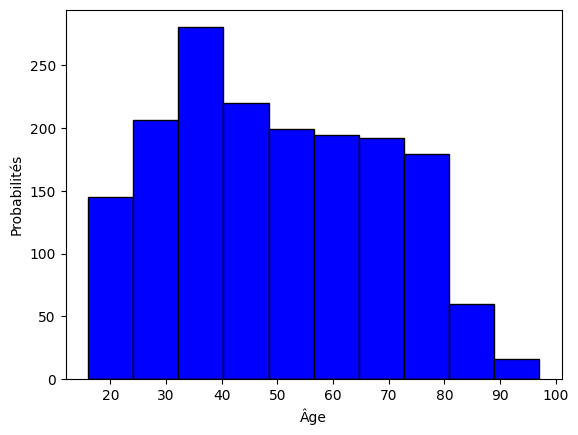

In [20]:
donnee = pd.read_csv('./Fichiers/DonneesFumeursv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

##"Génération des histogrammes et fonction de densité"

ax=donnee["Âge"].plot.hist(density=False, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")

ax=donnee["Âge"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")
ax.set_ylabel("Probabilités")



## d = num de segmentos da linha
d=100
grille_x = np.linspace(donnee["Âge"].min()-10, donnee["Âge"].max()+10, d)
dx=(donnee["Âge"].max()+10-(donnee["Âge"].min()-10))/(d-1)
Age_valeurs=donnee["Âge"].values.reshape(-1, 1)

0.9959804753942066


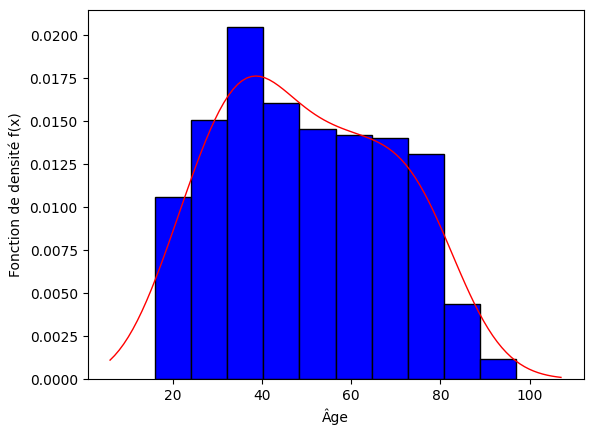

In [24]:
### bandwith = precisão da linha (2o gŕafico). Qto menor, mais cortada a linha
kde = KernelDensity(kernel='gaussian', bandwidth=8).fit(Age_valeurs)
TEST=kde.score_samples(grille_x.reshape(-1, 1))
pdf = np.exp(kde.score_samples(grille_x.reshape(-1, 1)))

fig, ax = plt.subplots()
ax=donnee["Âge"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")
ax.plot(grille_x, pdf, linewidth=1, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")

print((pdf*dx).sum())

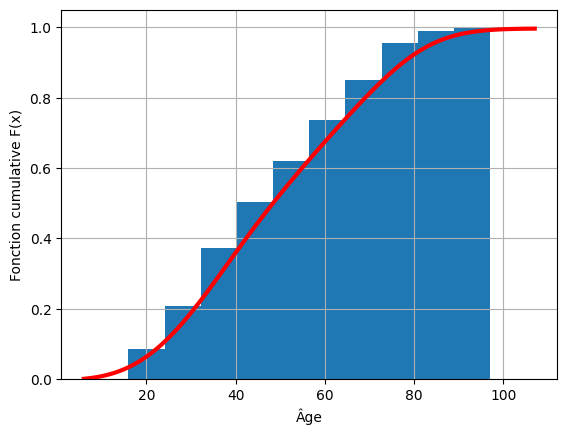

In [25]:
fig, ax = plt.subplots()
### exemplo cumulativo
donnee["Âge"].hist(cumulative=True, density=1, bins=10)
cdf = np.cumsum(pdf*dx)
ax.plot(grille_x, cdf, linewidth=3, color = 'red')
ax.set_xlabel("Âge")
ax.set_ylabel("Fonction cumulative F(x)")



grille_x_pd=pd.DataFrame(grille_x)
grille_x_pd.columns=["Âges"]
pdf_pd=pd.DataFrame(pdf)
### probability distribution
pdf_pd.columns=["PDF"]

cdf_pd=pd.DataFrame(cdf)
### cumulative distribution
cdf_pd.columns=["CDF"]  
DistAge=pd.concat([grille_x_pd,pdf_pd,cdf_pd],axis=1)

Prob_moins_40=DistAge["PDF"][DistAge["Âges"]<=40].sum()*dx

In [26]:
"Théorème de Bayes"


Travailleurs_fumeurs=donnee[(donnee["Fumeur?"] == 'Oui')] 
Travailleurs_dans_quarantaine = donnee[((donnee["Âge"] <= 49) & (donnee["Âge"] >= 40))]
Fumeurs_dans_quarantaine=donnee[((donnee["Fumeur?"] == 'Oui') & (donnee["Âge"] <= 49) & (donnee["Âge"] >= 40))]

P_fumeurs = Travailleurs_fumeurs.shape[0]/donnee.shape[0]
P_quarantaine = Travailleurs_dans_quarantaine.shape[0]/donnee.shape[0]
Prob_quarantaine_étant_fumeur = Fumeurs_dans_quarantaine.shape[0]/Travailleurs_fumeurs.shape[0]


Prob_fumeur_étant_quarantaine = Prob_quarantaine_étant_fumeur*P_fumeurs/P_quarantaine

Prob_fumeur_étant_quarantaine_theo = Fumeurs_dans_quarantaine.shape[0]/Travailleurs_dans_quarantaine.shape[0]

Text(0.5, 0, 'Grandeur (cm)')

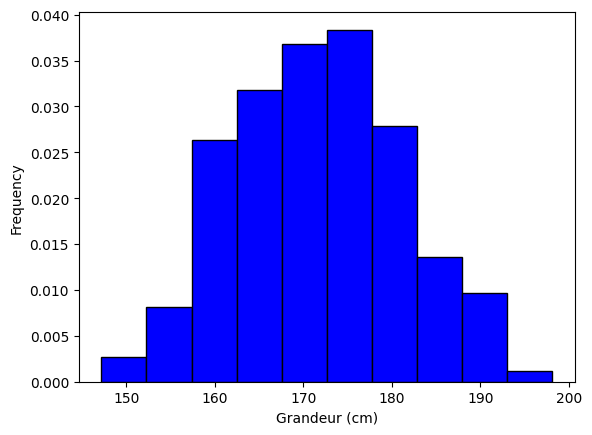

In [28]:
donnee = pd.read_csv('./Fichiers/PersonnesActivesv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

ax=donnee["Grandeur (cm)"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Grandeur (cm)")

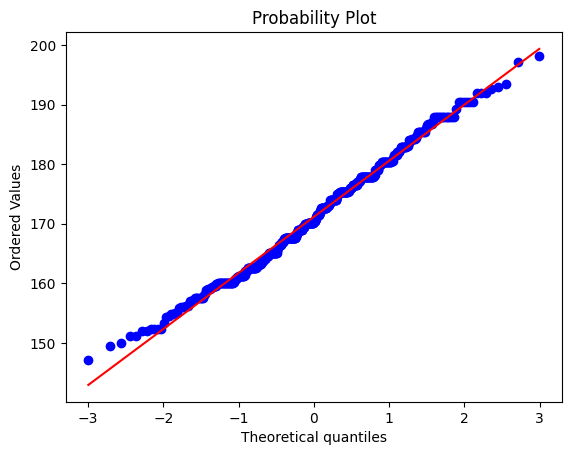

In [29]:
sts.probplot(donnee["Grandeur (cm)"].values, dist=sts.norm, plot=plt.figure().add_subplot(111))


d=1000
grille_x = np.linspace(donnee["Grandeur (cm)"].min(), donnee["Grandeur (cm)"].max(), d)
dx=(donnee["Grandeur (cm)"].max()-(donnee["Grandeur (cm)"].min()))/(d-1)

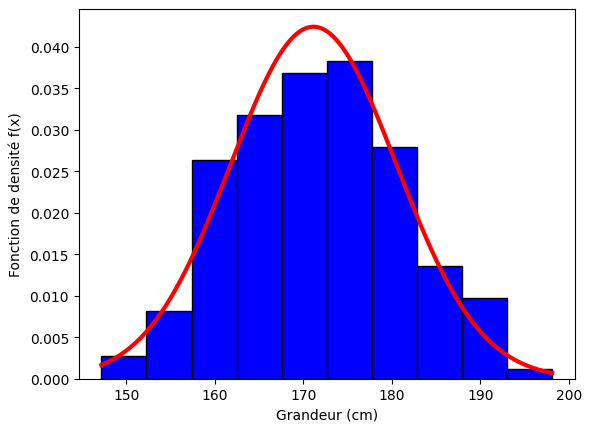

In [30]:
mu, sigma = sts.norm.fit(donnee["Grandeur (cm)"].values)
pdf = sts.norm.pdf(grille_x, mu, sigma)
ax=donnee["Grandeur (cm)"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Grandeur (cm)")
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


Fit_normal = sts.kstest(donnee["Grandeur (cm)"],'norm',[mu, sigma])

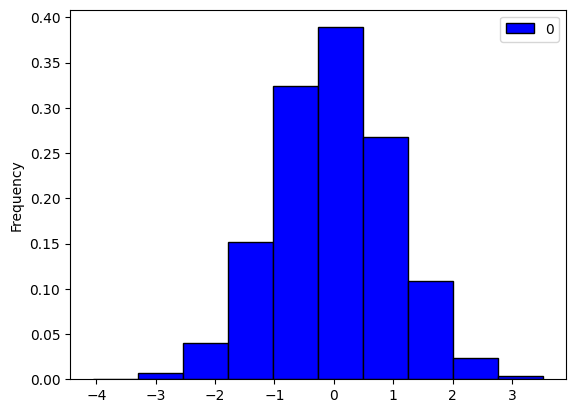

In [31]:
A=np.random.normal(0,1,10000)
ax=pd.DataFrame(A).plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')

In [32]:
Fit_normal2 = sts.kstest(A,'norm')


Z_scores=sts.zscore(donnee[["Âge","Poids (kg)","Grandeur (cm)"]].values,axis=0)

### probabilidade q a pessoa tenha mais de 180 p/ o mu e sigma calculados
print(1-sts.norm(mu, sigma).cdf(180))

### probabilidade de medir 171
print(sts.norm(mu, sigma).pdf(171))

0.17300456031912836
0.042445078230286204


In [33]:
donnee = pd.read_csv('./Fichiers/PersonnesActivesv0r2.csv')
stats = donnee.describe()
dimensions = donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

In [34]:
"Test d'hypothèse sur la moyenne des poids des hommes"

PoidsHommes = donnee[(donnee["Genre"] == "Homme")]["Poids (kg)"]
stats_PoidsHommes = PoidsHommes.describe()
n_H = PoidsHommes.shape[0]
X_barre_H_Poids = PoidsHommes.mean()
s_H_Poids = PoidsHommes.std()

In [35]:
"Cas 1"
## hipótese nula: peso médio = 84

mhu0H = 84
sigmaHPoids = math.sqrt(100)
Z0 = (X_barre_H_Poids-mhu0H)/(sigmaHPoids/(math.sqrt(n_H)))

## CV = critical value
CV1 = sts.norm.isf(0.05/2)
p_value_calc1 = sts.norm.sf(abs(Z0))*2
print(p_value_calc1)

# pvalue1=sts.ttest_1samp(PoidsHommes,84)
## p-value < 0.05 --> a diferença é significativa

3.494353024120157e-20


In [36]:
"Cas 2"
## hipótese nula: peso médio = 79

mhu0H = 79
t0 = (X_barre_H_Poids-mhu0H)/(s_H_Poids/(math.sqrt(n_H)))
CV2 = sts.t.isf(0.05/2, n_H-1)

p_value_calc2 = sts.t.sf(abs(t0), df=(n_H-1))*2

## shortcut p/ obter pvalue
pvalue2 = sts.ttest_1samp(PoidsHommes, 79)

print(pvalue2)

##pvalue>0.05 --> Não se pode rejeitar a hipótese nula

Ttest_1sampResult(statistic=-1.2788773746625888, pvalue=0.20214533914983476)


In [37]:
"Comparaison grandeurs moyennes entre hommes et femmes"

"Cas 3"

GrandeursHommes = donnee[(donnee["Genre"] == "Homme")]["Grandeur (cm)"]
GrandeursFemmes = donnee[(donnee["Genre"] == "Femme")]["Grandeur (cm)"]
Stats_H = GrandeursHommes.describe()
Stats_F = GrandeursFemmes.describe()

## média
X_barre_H_Grand = GrandeursHommes.mean()
X_barre_F_Grand = GrandeursFemmes.mean()

## desvio padrao
s_H_Grand = GrandeursHommes.std()
s_F_Grand = GrandeursFemmes.std()

## tamanho da populacao
n_H = GrandeursHommes.shape[0]
n_F = GrandeursFemmes.shape[0]


sigmaH = 7.4
sigmaF = 6.2

Z0 = (X_barre_H_Grand-X_barre_F_Grand)/math.sqrt(sigmaH**2/n_H+sigmaF**2/n_F)
CV3 = sts.norm.isf(0.05/2)
p_value_calc3 = sts.norm.sf(abs(Z0))*2
print(p_value_calc3)

#GrandeursHommesStats = stm.stats.DescrStatsW(GrandeursHommes)
#GrandeursFemmesStats = stm.stats.DescrStatsW(GrandeursFemmes)

#pval1= stm.stats.CompareMeans(GrandeursHommesStats,GrandeursFemmesStats).ztest_ind(usevar='unequal')


# SSE_H=sum(((GrandeursHommes.values-X_barre_H))**2)
# SSE_F=sum(((GrandeursFemmes.values-X_barre_F))**2)
# s_H=math.sqrt(SSE_H/(n_H-1))
# s_F=math.sqrt(SSE_F/(n_F-1))
# Sp=math.sqrt((SSE_H+SSE_F)/(n_H+n_F-2))

### Existe uma diferença significativa entre as médias de tamanho de homem e mulher

1.5856317616633426e-99


In [38]:
"Cas 4"
## variância desconhecida, h0: assume-se q a variância é igual

Sp = math.sqrt(((n_H-1)*s_H_Grand**2+(n_F-1)*s_F_Grand**2)/(n_H+n_F-2))
t0 = (X_barre_H_Grand-X_barre_F_Grand)/(Sp*math.sqrt(1/n_H+1/n_F))
CV4 = sts.t.isf(0.05/2, n_H+n_F-2)
p_value_calc4 = sts.t.sf(abs(t0), df=(n_H+n_F-2))*2
pvalue4 = sts.ttest_ind(GrandeursHommes, GrandeursFemmes)
print(pvalue4)


#### p-values < 0.05 ---> rejeita-se a hipótese nula, a diferença é significativa

Ttest_indResult(statistic=21.109478245457304, pvalue=2.2340956600230777e-71)


In [39]:
"Cas 5"

v = (s_H_Grand**2/n_H+s_F_Grand**2/n_F)**2 / \
    ((s_H_Grand**2/n_H)**2/(n_H+1)+(s_F_Grand**2/n_F)**2/(n_F+1))-2
t0 = (X_barre_H_Grand-X_barre_F_Grand) / \
    math.sqrt(s_H_Grand**2/n_H+s_F_Grand**2/n_F)
CV5 = sts.t.isf(0.05/2, v)
p_value_calc5 = sts.t.sf(abs(t0), df=(v))*2

print(p_value_calc5)

### ovalue < 0.05 ---> rejeita-se a hipótese nula

7.827561484996063e-71


In [40]:
### exemplo hockey

donnee = pd.read_csv('./Fichiers/JoueursHockeyv0r1.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

11.021670192822583
10.202724486759887
8.747804389254087
9.919064317501391
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.07646505759494053
F_onewayResult(statistic=array([2.29442079]), pvalue=array([0.07646506]))


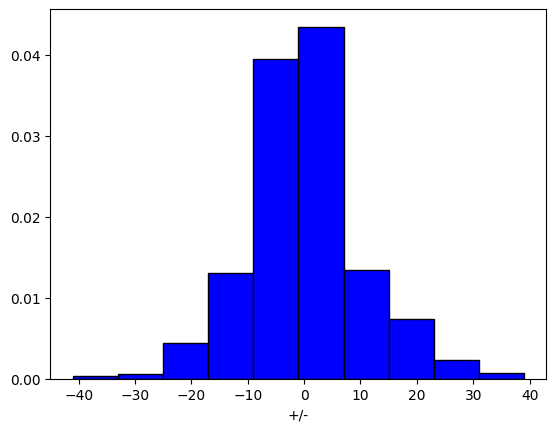

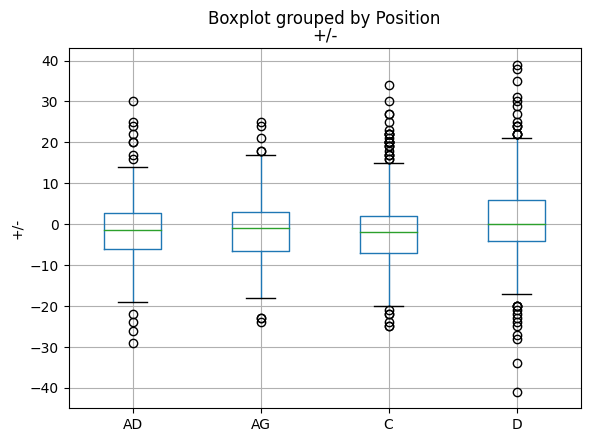

In [41]:
### + ou - jogador na quadra

ax=plt.hist(donnee["+/-"],density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("+/-")

ax = donnee.boxplot(by="Position", column="+/-")
ax.set_xlabel('')
ax.set_ylabel("+/-")


ValD=donnee[(donnee["Position"]=="D")]["+/-"].values.reshape(-1,1)
ValC=donnee[(donnee["Position"]=="C")]["+/-"].values.reshape(-1,1)
ValAG=donnee[(donnee["Position"]=="AG")]["+/-"].values.reshape(-1,1)
ValAD=donnee[(donnee["Position"]=="AD")]["+/-"].values.reshape(-1,1)

print(ValD.std())
print(ValC.std())
print(ValAG.std())
print(ValAD.std())


N=dimensions[0]
g=4
nD=ValD.shape[0]
nC=ValC.shape[0]
nAG=ValAG.shape[0]
nAD=ValAD.shape[0]
ytbar=donnee["+/-"].mean()
SSET=nD*((ValD.mean()-ytbar)**2)+nC*((ValC.mean()-ytbar)**2)+nAG*((ValAG.mean()-ytbar)**2)+nAD*((ValAD.mean()-ytbar)**2)
SSIT=((ValD-ValD.mean())**2).sum()+((ValC-ValC.mean())**2).sum()+((ValAG-ValAG.mean())**2).sum()+((ValAD-ValAD.mean())**2).sum()
SST=((ValD-ytbar)**2).sum()+((ValC-ytbar)**2).sum()+((ValAG-ytbar)**2).sum()+((ValAD-ytbar)**2).sum()
MSEET=SSET/(g-1)
MSEIT=SSIT/(N-g)
MSET=SST/(N-1)

## o q interessa é o F0
F0=MSEET/MSEIT
CV=sts.f.isf(0.05,g-1,N-g)
p_value=sts.f.sf(F0,g-1,N-g)
p_value_fonction_directe=sts.f_oneway(ValD,ValC,ValAG,ValAD)

#print("ValD: ", ValD)
#print("ValC: ", ValC)
#print("ValAG: ", ValAG)
#print("ValAD: ", ValAD)
print(type(ValD))
print(type(ValC))
print(type(ValAG))
print(type(ValAD))
print(p_value)
print(p_value_fonction_directe)

### pvalue > 0.05 ---> Aceita-se a hipótese nula. 
## Não existe uma diferença significativa entre todas as médias

In [42]:
"Différence entre 2 moyennnes"

print(ValD.mean())
print(ValC.mean())
print(ValAG.mean())
print(ValAD.mean())

pvalue = sts.ttest_ind(ValD,ValC)

0.6790123456790124
-1.1904761904761905
-1.2857142857142858
-0.9850746268656716


In [44]:
donnee = pd.read_csv('./Fichiers/Tomatesv0r1.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

X=donnee
MatriceR=X.corr()

"Régression ronde 1"

X=X.drop('Indice de goût', 1)
Y=donnee["Indice de goût"]

modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

"Régression ronde 2"

Xsimple=X["Couleur (a-band)"]
Origine=pd.DataFrame(np.ones((dimensions[0],1), dtype=int))
Origine.columns=["Ordonnée à l'origine"]
Xsimple=pd.concat([Xsimple,Origine],axis=1)
Y=donnee["Indice de goût"]
modele=sm.OLS(Y,Xsimple)
resultats=modele.fit()
Y_chap = resultats.predict(Xsimple)
resultats.summary()


/tmp/ipykernel_181094/3399474046.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('Indice de goût', 1)
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Indice de goût   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     184.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           9.82e-06
Time:                        17:02:23   Log-Likelihood:                -5.3762
No. Observations:                   8   AIC:                             14.75
Df Residuals:                       6   BIC:                             14.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Couleur (a-band)         0.6246      0.046     13.597      0.000       0.512       0.737
Ordonnée à l'origine    -3.6722      0.699     -5.253      0.002      -5.383      -1.962
==============================================================================
Omnibus:                        5.986   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                1.857
Skew:                          -1.152   Prob(JB):                        0.395
Kurtosis:                       3.517   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"VIF"

#X1=pd.DataFrame(X["Temps entreposage (jours)"].values.reshape(-1,1))
#X1.index=X.index
X1=X["Temps entreposage (jours)"]
X2=X["Couleur (a-band)"]
X3=X["Lycopene (mg/100g)"]

Origine=pd.DataFrame(np.ones((dimensions[0],1), dtype=int))
Origine.columns=["Ordonnée à l'origine"]
X1=pd.concat([X1,Origine],axis=1)
X2=pd.concat([X2,Origine],axis=1)
X3=pd.concat([X3,Origine],axis=1)

modele=sm.OLS(Y,X1)
resultats=modele.fit()
Y_chap = resultats.predict(X1)
resultats.summary()

modele=sm.OLS(Y,X2)
resultats=modele.fit()
Y_chap = resultats.predict(X2)
resultats.summary()

modele=sm.OLS(Y,X3)
resultats=modele.fit()
Y_chap = resultats.predict(X3)
resultats.summary()

/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Indice de goût   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     417.4
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           8.94e-07
Time:                        17:02:41   Log-Likelihood:                -2.1891
No. Observations:                   8   AIC:                             8.378
Df Residuals:                       6   BIC:                             8.537
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Lycopene (mg/100g)       2.9501      0.144     20.431      0.000       2.597       3.303
Ordonnée à l'origine   -17.8640      1.149    -15.546      0.000     -20.676     -15.052
==============================================================================
Omnibus:                        1.909   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                0.277
Skew:                          -0.452   Prob(JB):                        0.871
Kurtosis:                       3.124   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
"Approche avec VIF"

X1=X["Temps entreposage (jours)"]
X_not1=X[["Couleur (a-band)","Lycopene (mg/100g)"]]
modele=sm.OLS(X1,X_not1)
resultats=modele.fit()
resultats.summary()
VIF1=1/(1-resultats.rsquared)

X2=X["Couleur (a-band)"]
X_not2=X[["Temps entreposage (jours)","Lycopene (mg/100g)"]]
modele=sm.OLS(X2,X_not2)
resultats=modele.fit()
resultats.summary()
VIF2=1/(1-resultats.rsquared)

X3=X["Lycopene (mg/100g)"]
X_not3=X[["Couleur (a-band)","Temps entreposage (jours)"]]
modele=sm.OLS(X3,X_not3)
resultats=modele.fit()
resultats.summary()
VIF3=1/(1-resultats.rsquared)


from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIFPanda=pd.DataFrame(VIF)
VIFPanda.index=X.columns
VIFPanda.columns=["VIF"]

"Ronde 1"

X=X.drop('Couleur (a-band)', 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIFPanda=pd.DataFrame(VIF)
VIFPanda.index=X.columns
VIFPanda.columns=["VIF"]

modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/tmp/ipykernel_181094/2303737701.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('Couleur (a-band)', 1)
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 .

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Indice de goût   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     193.4
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.84e-05
Time:                        17:02:51   Log-Likelihood:                -1.7701
No. Observations:                   8   AIC:                             9.540
Df Residuals:                       5   BIC:                             9.779
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Temps entreposage (jours)     0.1338      0.180      0.743      0.491      -0.329       0.597
Lycopene (mg/100g)            1.9339      1.376      1.406      0.219      -1.603       5.470
const                       -11.2332      9.003     -1.248      0.267     -34.375      11.908
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                3.121
Skew:                          -1.398   Prob(JB):                        0.210
Kurtosis:                       4.245   Cond. No.                         982.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
"Ronde 2"

X=X.drop('Temps entreposage (jours)', 1)

modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

/tmp/ipykernel_181094/2363826905.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop('Temps entreposage (jours)', 1)
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Indice de goût   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     417.4
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           8.94e-07
Time:                        17:03:10   Log-Likelihood:                -2.1891
No. Observations:                   8   AIC:                             8.378
Df Residuals:                       6   BIC:                             8.537
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Lycopene (mg/100g)     2.9501      0.144     20.431      0.000       2.597       3.303
const                -17.8640      1.149    -15.546      0.000     -20.676     -15.052
==============================================================================
Omnibus:                        1.909   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                0.277
Skew:                          -0.452   Prob(JB):                        0.871
Kurtosis:                       3.124   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
donnee = pd.read_csv('./Fichiers/Poissonsv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

X=donnee.drop({'Espèces','Poids (g)'}, 1)
Y=donnee['Poids (g)']
Yclass=donnee['Espèces']

"Ronde 1"
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

"Ronde 2"
X2=X.drop({'Longueur 2 (cm)','Épaisseur (cm)'}, 1)
modele=sm.OLS(Y,X2.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X2.assign(const=1))
resultats.summary()


/tmp/ipykernel_181094/2388271718.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=donnee.drop({'Espèces','Poids (g)'}, 1)
/tmp/ipykernel_181094/2388271718.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2=X.drop({'Longueur 2 (cm)','Épaisseur (cm)'}, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Poids (g)   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     395.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.33e-72
Time:                        17:04:13   Log-Likelihood:                -988.61
No. Observations:                 159   AIC:                             1985.
Df Residuals:                     155   BIC:                             1997.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Longueur 1 (cm)    70.3272     13.200      5.328      0.000      44.253      96.402
Longueur 3 (cm)   -40.9376     12.477     -3.281      0.001     -65.584     -16.291
Hauteur (cm)       35.9229      5.457      6.583      0.000      25.143      46.703
const            -491.4670     28.243    -17.402      0.000    -547.257    -435.677
==============================================================================
Omnibus:                       14.969   Durbin-Watson:                   0.463
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.843
Skew:                           0.631   Prob(JB):                     0.000134
Kurtosis:                       4.049   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"PCA"

from scipy import linalg
X_mean=X.mean()
X_std=X.std()
X_cent=X-X.mean().T
Lambdas,PT =linalg.eig(np.dot(X_cent.T,X_cent))
P=PT.T
VarianceCapturee=np.real(Lambdas/(Lambdas.sum()))

P1=P[0,:].reshape(1,-1)
P2=P[1,:].reshape(1,-1)
T=np.dot(X_cent,P.T)
T1_test=np.dot(X_cent,P1.T)
T2_test=np.dot(X_cent,P2.T)
T1=T[:,0]
T2=T[:,1]
Xest=np.dot(T,P)+X_mean.values.reshape(-1,1).T

P2,E2,P_mat2 =linalg.svd(X_cent)
P1v2=P_mat2[0,:]


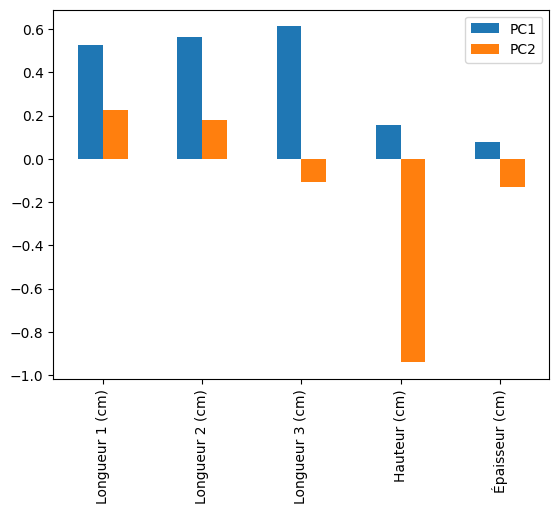

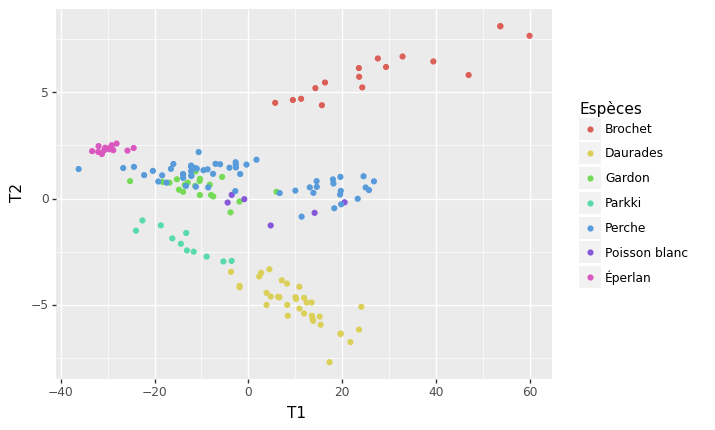

In [52]:
"Directement des fonctions"

from sklearn.decomposition import PCA
a=2
pca = PCA(n_components=a)
pca.fit(X)
VarianceCapturee=pca.explained_variance_ratio_
X_pca_mean=pca.mean_
T=pca.transform(X)
P=pca.components_


T1=np.dot((X.values-X_pca_mean),P[0,:])
T2=np.dot((X.values-X_pca_mean),P[1,:])
Xest=pca.inverse_transform(T)


TPanda=pd.DataFrame(T)
TPanda.index=X.index
TPanda.columns=['T1','T2']
T_resultats=pd.concat([TPanda,Yclass],axis=1)

PPanda=pd.DataFrame(P.T)
PPanda.index=X.columns
PPanda.columns=['PC1','PC2']

PPanda.plot.bar()

import plotnine as p9
graph = p9.ggplot(data=T_resultats,
           mapping=p9.aes(x='T1', y='T2', color='Espèces'))
print(graph + p9.geom_point())

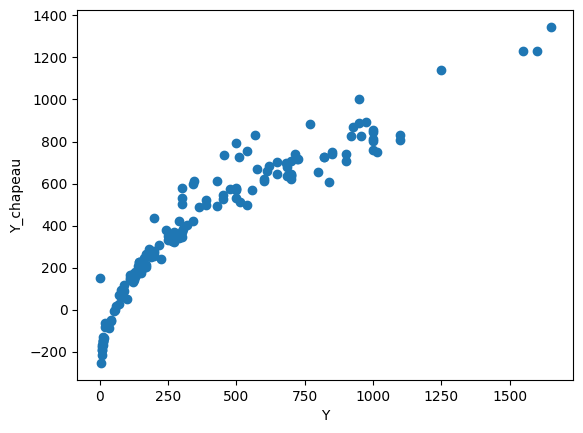

In [53]:
"PCR"

CORRMAT=TPanda.corr()
modele=sm.OLS(Y,TPanda.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(TPanda.assign(const=1))
resultats.summary()

Betas=resultats.params
Betasfinaux=np.dot(Betas[0:2],P).reshape(-1,1)
BetasfinauxPanda=pd.DataFrame(Betasfinaux)
BetasfinauxPanda.index=X.columns
ordonnee=pd.Series(Betas[2])
ordonnee.index=['Beta0']
BetasfinauxPanda=pd.concat([BetasfinauxPanda,ordonnee],axis=0)
BetasfinauxPanda.columns=['Betas']

Ypix_chap=np.dot(((X-X_pca_mean).assign(const=1)).values,BetasfinauxPanda.values)
plt.scatter(Y, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()
Y_chap=pd.DataFrame(Ypix_chap)
R2=np.corrcoef(Y.T,Y_chap.T)[0,1]

In [56]:
donnee = pd.read_csv('./Fichiers/DonneesBiometriquesv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)



"Préparation des matrices"

X=donnee
X=X.drop({'Genre'},1)
Yclass=donnee['Genre']

MatriceR=X.corr()


"Stardardisation"

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns

"PCA"

from sklearn.decomposition import PCA
a=2
pca = PCA(n_components=a)
pca.fit(Xstand)
VarianceCapturee=pca.explained_variance_ratio_
X_pca_mean=pca.mean_
T=pca.transform(Xstand)
P=pca.components_

### qto de prediçao o modelo consegue (soma dos valores)
print(VarianceCapturee)

[0.67900941 0.09119745]


/tmp/ipykernel_181094/2549864452.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


<AxesSubplot: >

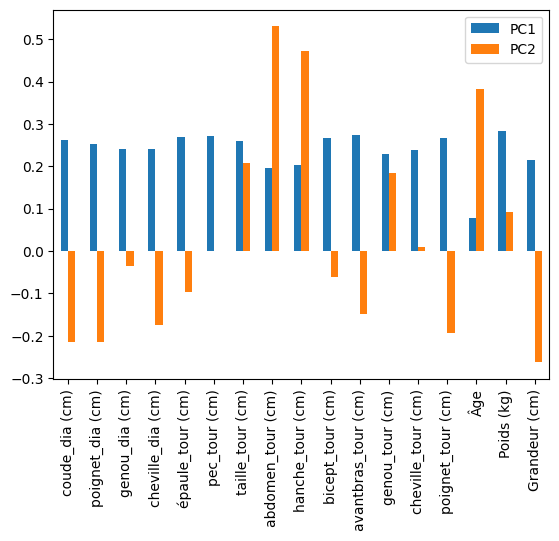

In [57]:
T1=np.dot((Xstand.values-X_pca_mean),P[0,:])
T2=np.dot((Xstand.values-X_pca_mean),P[1,:])
Xest=pca.inverse_transform(T)


TPanda=pd.DataFrame(T)
TPanda.index=X.index
TPanda.columns=['T1','T2']
T_resultats=pd.concat([TPanda,Yclass],axis=1)

PPanda=pd.DataFrame(P.T)
PPanda.index=X.columns
PPanda.columns=['PC1','PC2']

PPanda.plot.bar()

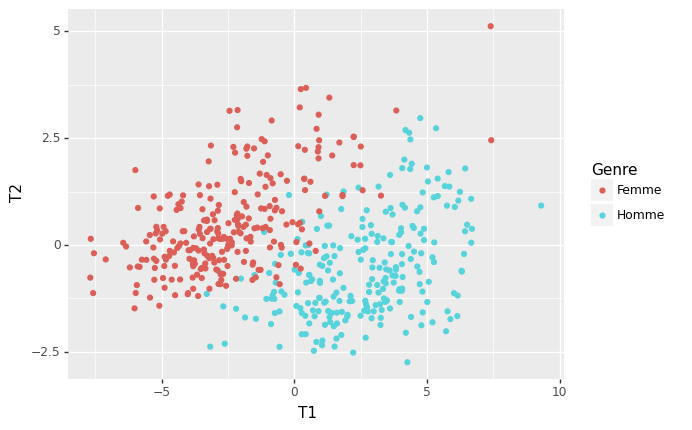

In [58]:
import plotnine as p9
graph = p9.ggplot(data=T_resultats,
           mapping=p9.aes(x='T1', y='T2', color='Genre'))
print(graph + p9.geom_point())

In [59]:
donnee = pd.read_csv('./Fichiers/DonneesBaseballv0r1.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

donnee=donnee.dropna()

X=donnee.drop('Salaire (milliers $)', 1)
Y=pd.DataFrame(donnee["Salaire (milliers $)"])

/tmp/ipykernel_181094/754523290.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [60]:
"Régression linéaire et multicolinéarité"

modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Salaire (milliers $)   R-squared:                       0.528
Model:                              OLS   Adj. R-squared:                  0.497
Method:                   Least Squares   F-statistic:                     17.19
Date:                  Thu, 15 Dec 2022   Prob (F-statistic):           1.02e-31
Time:                          17:06:58   Log-Likelihood:                -1881.4
No. Observations:                   263   AIC:                             3797.
Df Residuals:                       246   BIC:                             3857.
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Présences                    -2.2030      0.636     -3.464      0.001      -3.456      -0.950
Coups sûrs                    7.8278      2.402      3.259      0.001       3.097      12.559
Circuits                      2.1635      6.236      0.347      0.729     -10.120      14.447
Points                       -2.0996      3.008     -0.698      0.486      -8.025       3.826
Sacrifices                   -0.0229      2.610     -0.009      0.993      -5.164       5.119
Buts sur balle                6.1511      1.840      3.342      0.001       2.526       9.776
Années                       -2.5924     12.454     -0.208      0.835     -27.122      21.938
Carrière - Présences         -0.1763      0.137     -1.290      0.198      -0.445       0.093
Carrière - Coups sûrs         0.0698      0.679      0.103      0.918      -1.267       1.407
Carrière - Circuits          -0.2331      1.636     -0.143      0.887      -3.455       2.989
Carrière - Points             1.6101      0.752      2.142      0.033       0.130       3.090
Carrière - Sacrifices         0.8014      0.700      1.145      0.253      -0.577       2.180
Carrière - Buts sur balle    -0.7939      0.332     -2.388      0.018      -1.449      -0.139
Retraits                      0.2946      0.078      3.762      0.000       0.140       0.449
Assistances                   0.3840      0.224      1.716      0.087      -0.057       0.825
Erreurs                      -2.8787      4.421     -0.651      0.516     -11.586       5.829
const                       126.1055     83.624      1.508      0.133     -38.606     290.817
==============================================================================
Omnibus:                       94.079   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.346
Skew:                           1.312   Prob(JB):                    2.07e-117
Kurtosis:                       9.492   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIFPanda=pd.DataFrame(VIF)
VIFPanda.index=X.columns
VIFPanda.columns=["VIF"]

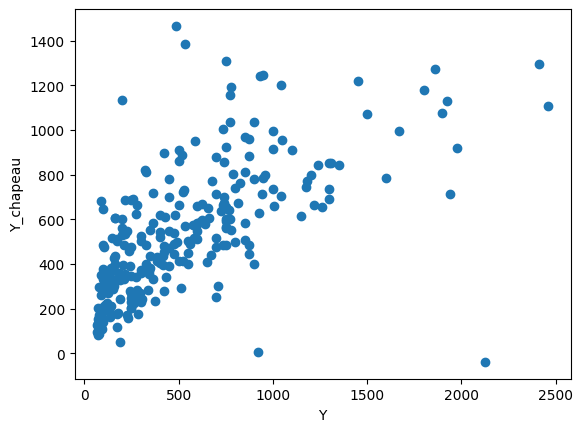

In [62]:
"Régression PLS"


from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
a=1
pls_model = PLSRegression(n_components=a).fit(X,Y)
Y_chap=pls_model.predict(X)
Y_chap=pd.DataFrame(Y_chap)
R2=r2_score(Y,Y_chap)

plt.scatter(Y, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()

Text(0.5, 0, 'Nombre de composantes principales')

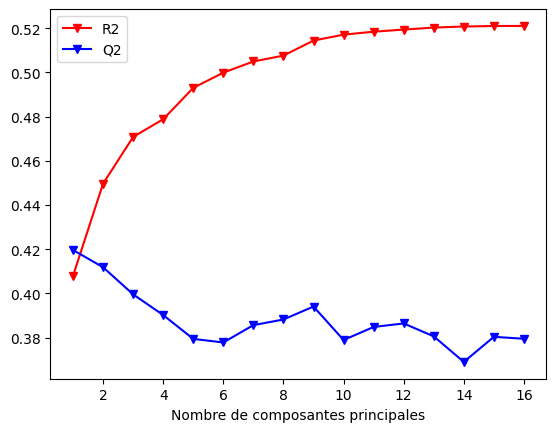

In [63]:
"Déterminer le nombre de composantes principales"


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,random_state=50)

R2_global =list()
Q2_global =list()
for i in np.arange(1,X.shape[1]+1):
    pls_model = PLSRegression(n_components=i).fit(X_train,Y_train)
    Y_chap_train=pls_model.predict(X_train)
    Y_chap_train=pd.DataFrame(Y_chap_train)
    Y_chap_train.columns=Y_train.columns
    R2=r2_score(Y_train,Y_chap_train)
    R2_global.append(R2)
    Y_chap_test=pls_model.predict(X_test)
    Y_chap_test=pd.DataFrame(Y_chap_test)
    Y_chap_test.columns=Y_test.columns
    Q2=r2_score(Y_test,Y_chap_test)
    Q2_global.append(Q2)
    
    
ax=plt.plot(np.arange(1,X.shape[1]+1),np.array(R2_global),"-v",c="r",label='R2');
ax=plt.plot(np.arange(1,X.shape[1]+1),np.array(Q2_global),"-v",c="b",label='Q2');
ax=plt.legend()
plt.xlabel("Nombre de composantes principales")

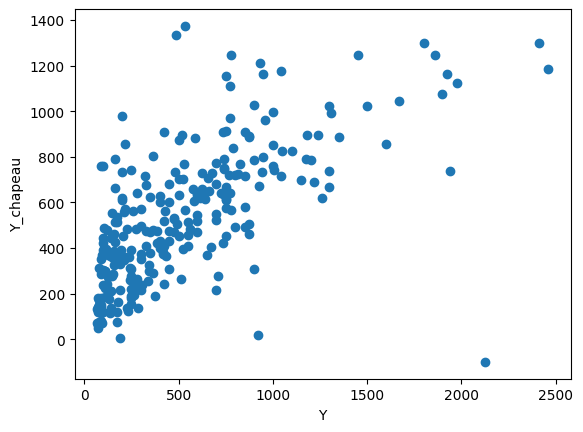

In [64]:
"Choix"

pls_model = PLSRegression(n_components=2, max_iter=10000,tol=1e-10).fit(X,Y)
Y_chap=pls_model.predict(X)
Y_chap=pd.DataFrame(Y_chap)
Y_chap.columns=Y.columns
R2=r2_score(Y,Y_chap)
#R2alt=(((Y_chap-Y.mean())**2).sum())/(((Y-Y.mean())**2).sum())

plt.scatter(Y, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()

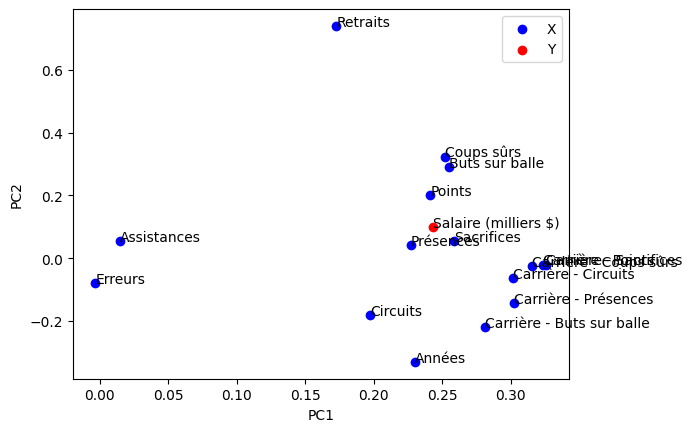

In [65]:
## Quais variáveis x mais influcneciam as variáveis y
## qto mais perto de y, melhor é o x
"Loadings (weights) plot"

W=pls_model.x_weights_
P=pls_model.x_loadings_
W_s=np.dot(W,np.linalg.inv(np.dot(P.T,W)))
X_loadings=pd.DataFrame(W_s)
X_loadings=pd.concat([X_loadings,pd.DataFrame(X.columns)],axis=1)
X_loadings.index=X.columns
X_loadings.columns=['PC1','PC2','Tag']

Y_loadings=pd.DataFrame(pls_model.y_weights_)
Y_loadings=pd.concat([Y_loadings,pd.DataFrame(["Salaire (milliers $)"])],axis=1)
Y_loadings.index=["Salaire (milliers $)"]
Y_loadings.columns=['PC1','PC2','Tag']

PLS_Loadings=pd.concat([X_loadings,Y_loadings],axis=0)

#import plotnine as p9
#graph = p9.ggplot(data=PLS_Loadings,
#           mapping=p9.aes(x='PC1', y='PC2', color='Tag'))
#print(graph + p9.geom_point())


fig, ax = plt.subplots()
ax.scatter(X_loadings['PC1'], X_loadings['PC2'],color='blue',label='X')
ax.scatter(Y_loadings['PC1'], Y_loadings['PC2'],color='red',label='Y')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#ax.set_xlim([-0.5,0.5])
#ax.set_ylim([-1,1])

for i, txt in enumerate(PLS_Loadings['Tag']):
    ax.annotate(txt, (PLS_Loadings['PC1'][i], PLS_Loadings['PC2'][i]))
ax=plt.legend()

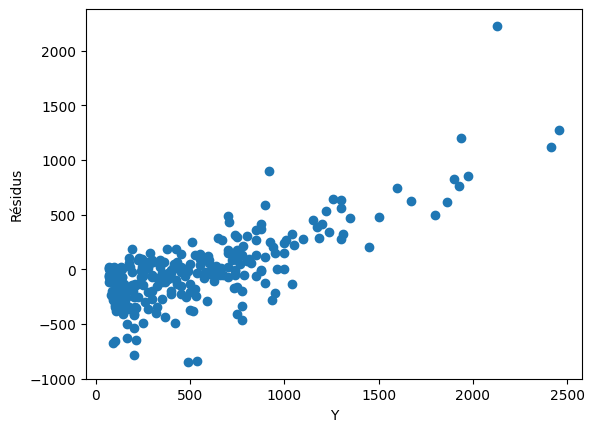

Text(0.5, 0, 'Erreurs')

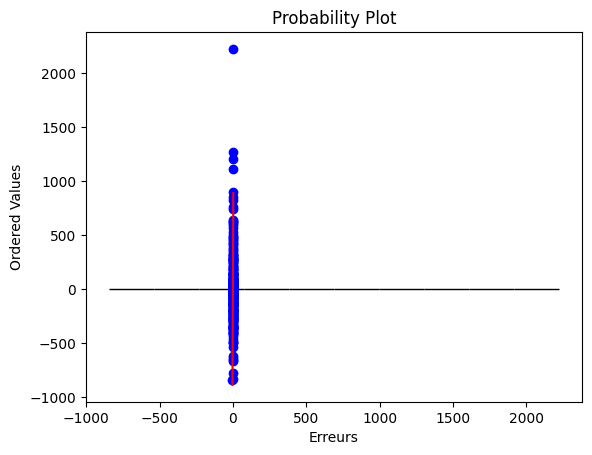

In [66]:
"Calcul des VIP"
#Code proposé de https://github.com/scikit-learn/scikit-learn/issues/7050

T = pls_model.x_scores_
W = pls_model.x_weights_
Q = pls_model.y_loadings_
p, h = W.shape
VIPs = np.zeros((p,))
s = np.diag(T.T @ T @ Q.T @ Q).reshape(h, -1)
total_s = np.sum(s)
for i in range(p):
    weight = np.array([ (W[i,j] / np.linalg.norm(W[:,j]))**2 for j in range(h) ])
    VIPs[i] = np.sqrt(p*(s.T @ weight)/total_s)
VIP_Panda=pd.DataFrame(VIPs)
VIP_Panda.index=X.columns
VIP_Panda.columns=["VIP"]

"Vérification modèle"


MatriceR=donnee.corr()

Epsilon=Y.values.reshape(-1,1)-Y_chap.values.reshape(-1,1)
plt.figure(1)
plt.plot(Y, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()
sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))
ax=plt.hist(Epsilon,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Erreurs")


In [67]:
"Calcul des Betas de régression (Matrice B)"

T=pls_model.x_scores_
x_mean=pls_model.x_mean_
x_std=pls_model.x_std_
y_mean=pls_model.y_mean_
y_std=pls_model.y_std_
Y_std=(Y-y_mean)/y_std
B=np.dot(np.dot(np.dot(W_s,np.linalg.inv(np.dot(T.T,T))),T.T),Y_std)

Y_CHAPEAU=(np.dot(((X-x_mean)/x_std),B))*y_std+y_mean

AttributeError: 'PLSRegression' object has no attribute 'x_mean_'

/tmp/ipykernel_181094/1768012877.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


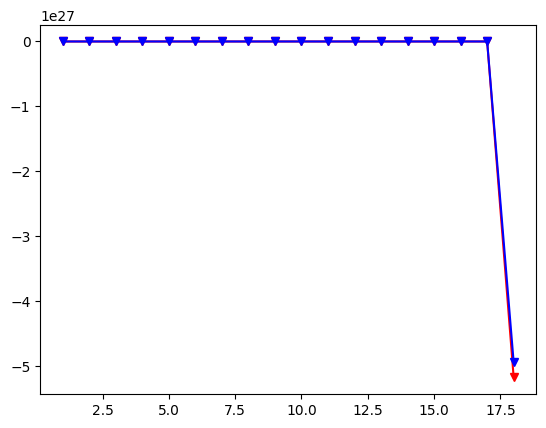

In [68]:
donnee = pd.read_csv('./Fichiers/DonneesBiometriquesv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

donnee=donnee.dropna()

X=donnee.drop('Poids (kg)', 1)
X=pd.get_dummies(X)
#Normalement il faut enlever une des variables créées par pd.get_dummies
#X=X.drop('Genre_Homme', 1)
Y=donnee["Poids (kg)"]

"Régression linéaire et multicolinéarité"

modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIFPanda=pd.DataFrame(VIF)
VIFPanda.index=X.columns
VIFPanda.columns=["VIF"]


"Régression PLS"

from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

pls_model = PLSRegression(n_components=1).fit(X,Y)
Y_chap=pls_model.predict(X)
Y_chap=pd.DataFrame(Y_chap)
R2=r2_score(Y,Y_chap)


"Déterminer le nombre de composantes principales"


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,random_state=50)


R2_global =list()
Q2_global =list()
for i in np.arange(1,X.shape[1]+1):
    pls_model = PLSRegression(n_components=i).fit(X_train,Y_train)
    Y_chap_train=pls_model.predict(X_train)
    Y_chap_train=pd.DataFrame(Y_chap_train)
    R2=r2_score(Y_train,Y_chap_train)
    R2_global.append(R2)
    Y_chap_test=pls_model.predict(X_test)
    Y_chap_test=pd.DataFrame(Y_chap_test)
    Q2=r2_score(Y_test,Y_chap_test)
    Q2_global.append(Q2)
    
    
ax=plt.plot(np.arange(1,X.shape[1]+1),np.array(R2_global),"-v",c="r");
ax=plt.plot(np.arange(1,X.shape[1]+1),np.array(Q2_global),"-v",c="b");


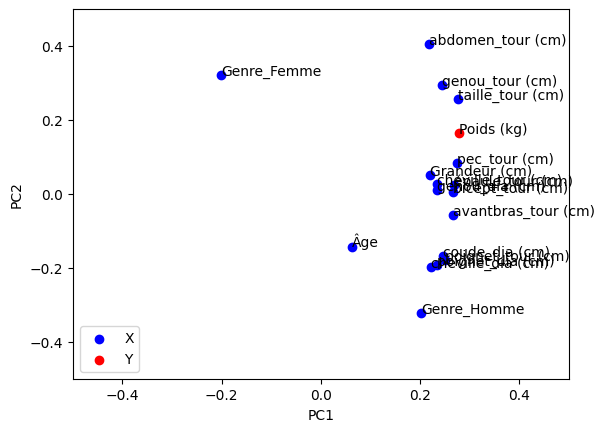

In [69]:
"Choix"

pls_model = PLSRegression(n_components=2).fit(X,Y)
Y_chap=pls_model.predict(X)
Y_chap=pd.DataFrame(Y_chap)
R2=r2_score(Y,Y_chap)

"Loadings plot"

W=pls_model.x_weights_
P=pls_model.x_loadings_
W_s=np.dot(W,np.linalg.inv(np.dot(P.T,W)))
X_loadings=pd.DataFrame(W_s)
X_loadings=pd.concat([X_loadings,pd.DataFrame(X.columns)],axis=1)
X_loadings.index=X.columns
X_loadings.columns=['PC1','PC2','Tag']

Y_loadings=pd.DataFrame(pls_model.y_weights_)
Y_loadings=pd.concat([Y_loadings,pd.DataFrame(["Poids (kg)"])],axis=1)
Y_loadings.index=["Poids (kg)"]
Y_loadings.columns=['PC1','PC2','Tag']


PLS_Loadings=pd.concat([X_loadings,Y_loadings],axis=0)

fig, ax = plt.subplots()
ax.scatter(X_loadings['PC1'], X_loadings['PC2'],color='blue',label='X')
ax.scatter(Y_loadings['PC1'], Y_loadings['PC2'],color='red',label='Y')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.5,0.5])


for i, txt in enumerate(PLS_Loadings['Tag']):
    ax.annotate(txt, (PLS_Loadings['PC1'][i], PLS_Loadings['PC2'][i]))
ax=plt.legend(loc='lower left')

In [70]:
"Calcul des VIP"
#Code proposé de https://github.com/scikit-learn/scikit-learn/issues/7050

T = pls_model.x_scores_
W = pls_model.x_weights_
Q = pls_model.y_loadings_
p, h = W.shape
VIPs = np.zeros((p,))
s = np.diag(T.T @ T @ Q.T @ Q).reshape(h, -1)
total_s = np.sum(s)
for i in range(p):
    weight = np.array([ (W[i,j] / np.linalg.norm(W[:,j]))**2 for j in range(h) ])
    VIPs[i] = np.sqrt(p*(s.T @ weight)/total_s)
VIP_Panda=pd.DataFrame(VIPs)
VIP_Panda.index=X.columns
VIP_Panda.columns=["VIP"]

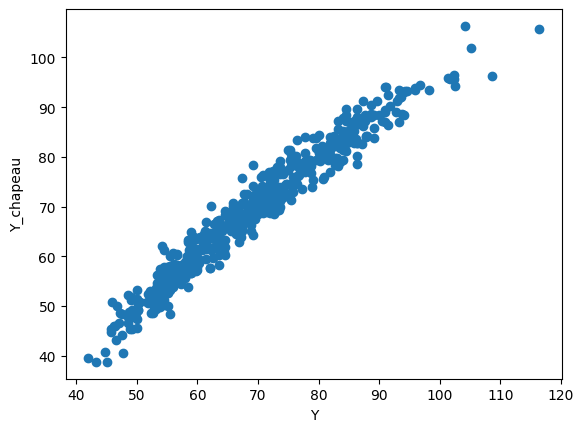

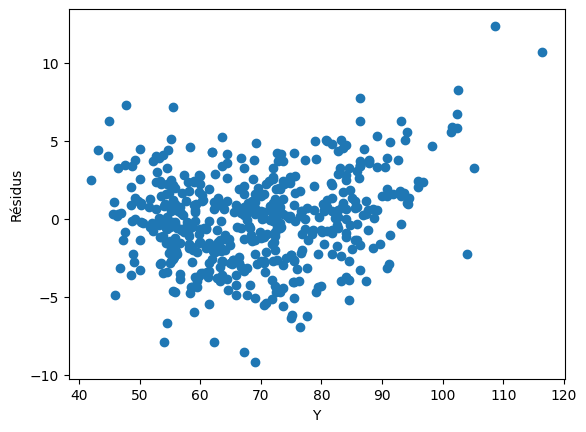

Text(0.5, 0, 'Erreurs')

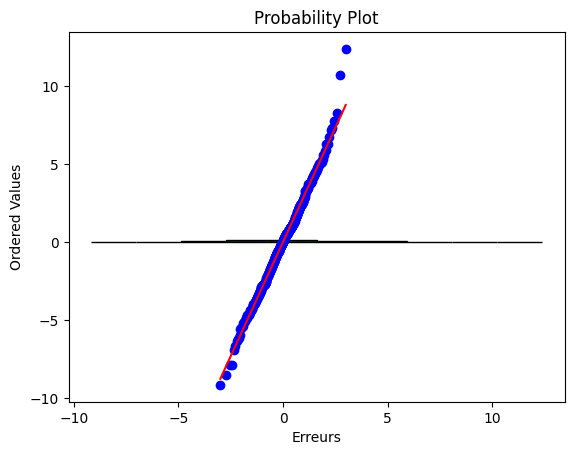

In [71]:
"Vérification modèle"

plt.scatter(Y, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()


Epsilon=Y.values.reshape(-1,1)-Y_chap.values.reshape(-1,1)
plt.figure(1)
plt.plot(Y, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()
sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))
ax=plt.hist(Epsilon,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Erreurs")